In [1]:
#add library folder to path
import sys
sys.path.append('../code/functions')
sys.path.append('../code/tests')

In [2]:
#import required libraries
from pipeline import analyzeTimepoint
from cluster import Cluster
import connectLib as cLib
import mouseVis as vis
import quality as qa

In [3]:
#import required modules
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#load test data
data = pickle.load(open('../code/tests/synthDat/realDataRaw_t0.io', 'r'))[0:7]

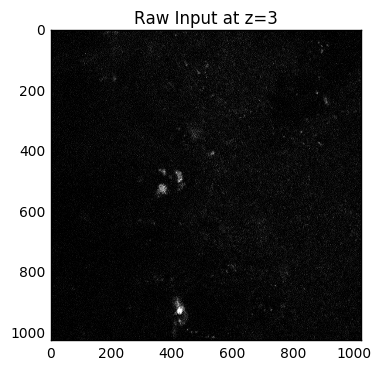

In [5]:
#display raw input
plt.figure()
plt.imshow(data[3], cmap='gray')
plt.title('Raw Input at z=3')
plt.show()

In [6]:
#run the pipeline up to the thresholding step
#arguments given are plos neighborhood, lower z bound, and upper z bound
preThreshData, binOut = analyzeTimepoint(data, 1, 1, 1, True)

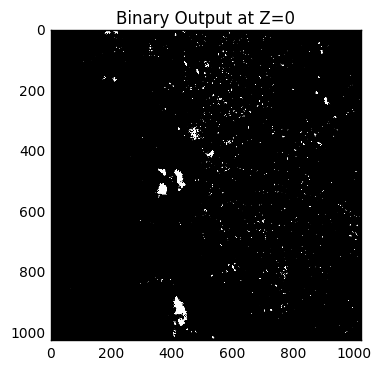

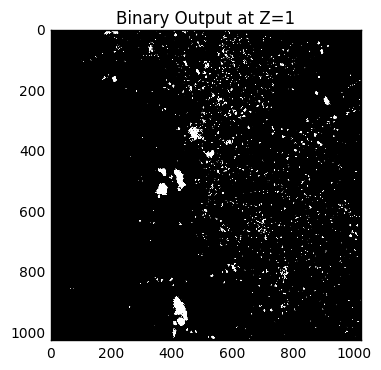

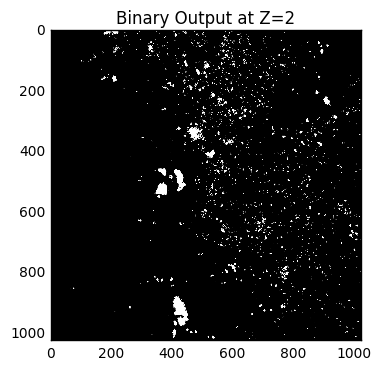

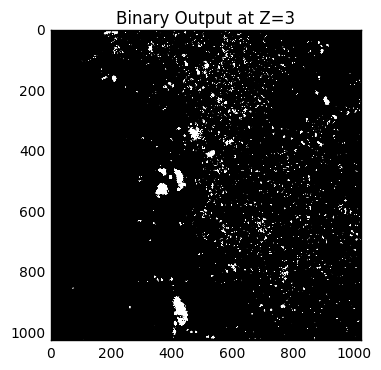

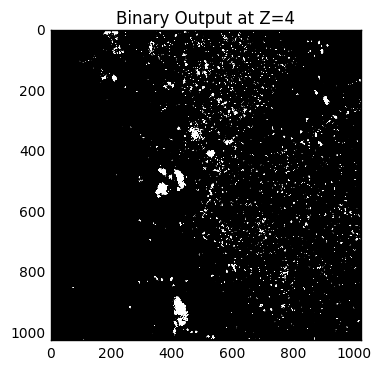

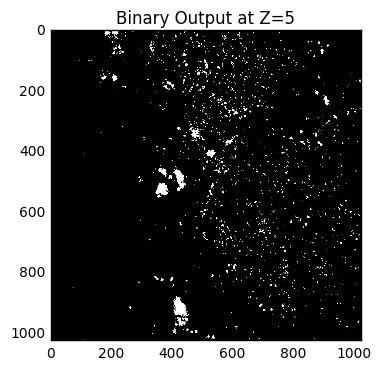

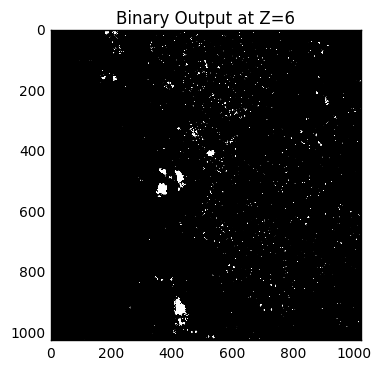

In [7]:
for z, img2d in enumerate(binOut):
    plt.figure()
    plt.title('Binary Output at Z='+str(z))
    plt.imshow(img2d, cmap='gray')
    plt.show()

In [8]:
#Delete the background cluster
del preThreshData[0]

In [18]:
#threshold based on old assumption
oldThresh = cLib.thresholdByVolumeNaive(preThreshData, lowerLimit = 0, upperLimit = 100)

In [19]:
#threshold based on new assumption
newThresh = cLib.thresholdByVolumeNaive(preThreshData, lowerLimit = 111, upperLimit = 158)

In [20]:
oldThreshAnnot = vis.generateAnnotations(oldThresh, data.shape[0], data.shape[1], data.shape[2])
newThreshAnnot = vis.generateAnnotations(newThresh, data.shape[0], data.shape[1], data.shape[2])

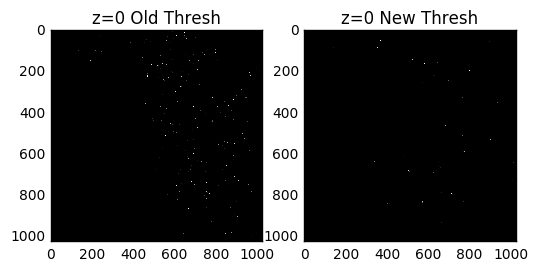

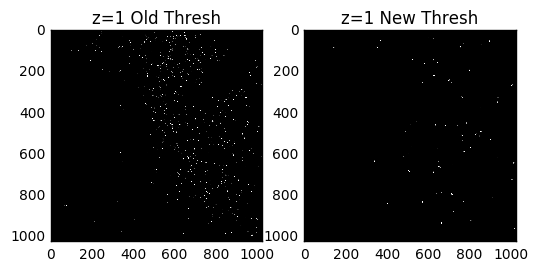

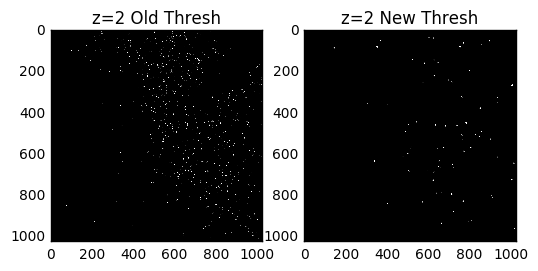

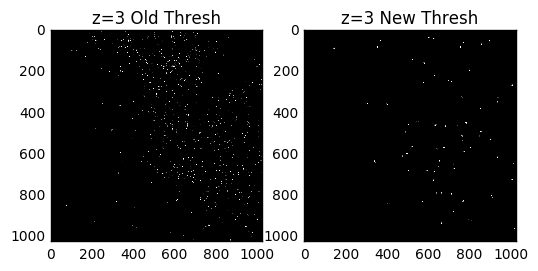

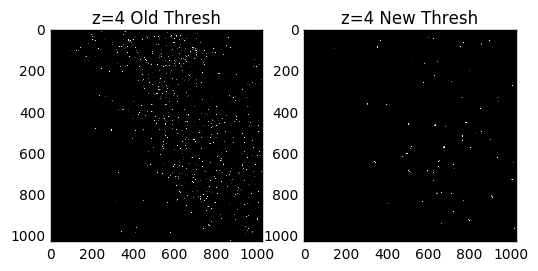

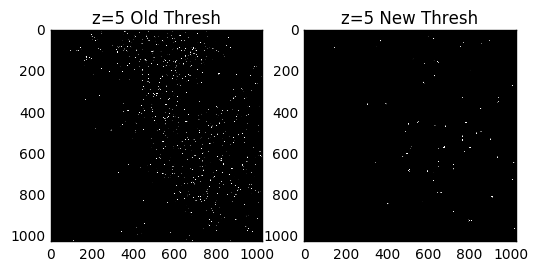

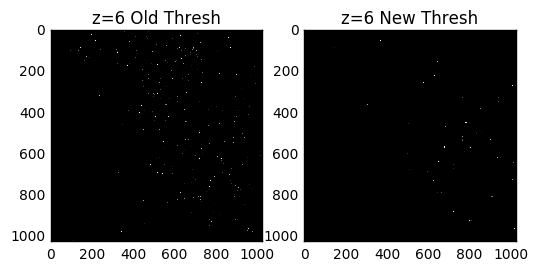

In [21]:
for z, _ in enumerate(data):
    fig = plt.figure()
    subPlt = fig.add_subplot(1,2,1)
    plt.imshow(oldThreshAnnot[z], cmap='gray')
    plt.title('z='+ str(z)+' Old Thresh')
    
    subPlt = fig.add_subplot(1, 2, 2)
    plt.imshow(newThreshAnnot[z], cmap='gray')
    plt.title('z='+ str(z)+' New Thresh')
    
    plt.show()

In [22]:
oldThreshDensity = qa.getPercentDetected(oldThreshAnnot)
newThreshDensity = qa.getPercentDetected(newThreshAnnot)
print 'Old Thresh Density is: ', oldThreshDensity
print 'New Thresh Density is: ', newThreshDensity

Old Thresh Density is:  0.00592367989676
New Thresh Density is:  0.00123459952218


In [23]:
oldThreshVolume = qa.getAverageVolume(oldThreshAnnot)
newThreshVolume = qa.getAverageVolume(newThreshAnnot)
print 'Old Thresh Average Volume is: ', oldThreshVolume
print 'New Thresh Average Volume is: ', newThreshVolume

Old Thresh Average Volume is:  18.6289631534
New Thresh Average Volume is:  131.333333333
